In [ ]:
# import some necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Model,Sequential
from keras.layers import Dense, Input, Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

In [ ]:
data = pd.read_csv('train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [ ]:
data = data.drop(['id'], axis = 1)
data.isnull().sum().head(55)

Year_Factor                 0
State_Factor                0
building_class              0
facility_type               0
floor_area                  0
year_built               1837
energy_star_rating      26709
ELEVATION                   0
january_min_temp            0
january_avg_temp            0
january_max_temp            0
february_min_temp           0
february_avg_temp           0
february_max_temp           0
march_min_temp              0
march_avg_temp              0
march_max_temp              0
april_min_temp              0
april_avg_temp              0
april_max_temp              0
may_min_temp                0
may_avg_temp                0
may_max_temp                0
june_min_temp               0
june_avg_temp               0
june_max_temp               0
july_min_temp               0
july_avg_temp               0
july_max_temp               0
august_min_temp             0
august_avg_temp             0
august_max_temp             0
september_min_temp          0
september_

There appear to be a lot of missing values; particularly year_built, energy_star_rating, direction_max_wind_speed, direction_peak_wind_speed, max_wind_speed. Additionally, we can drop the 'id' column right away because it is just an increasing number that doesn't have any significance over what we are trying to predict. 

In [ ]:
# Next, we split our data into X and Y
X = data.drop(['site_eui'], axis = 1)
Y = data['site_eui']

In [ ]:
# There are a couple variables that are 'Object' type, so they must be changed to categorical
X['Year_Factor'] = to_categorical(X['Year_Factor'])
X['building_class'] = to_categorical(X['building_class'].factorize()[0])
X['facility_type'] = to_categorical(X['facility_type'].factorize()[0])
X['State_Factor'] = to_categorical(X['State_Factor'].factorize()[0])

<AxesSubplot:>

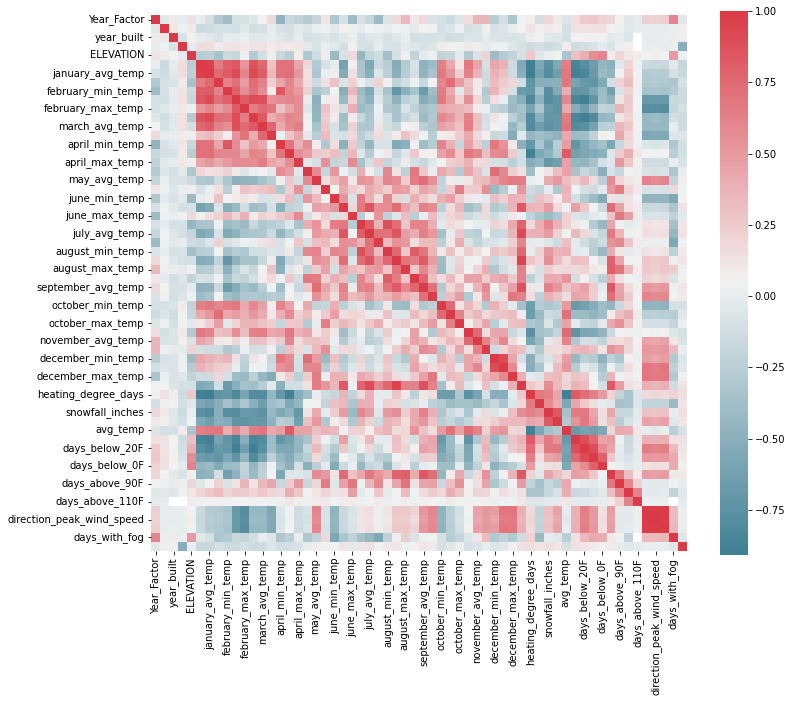

In [ ]:
f, ax = plt.subplots(figsize = (12, 10))
corr = data.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = bool), cmap = sns.diverging_palette(220, 10, as_cmap = True), square = True, ax = ax)

A lot of these features are highly correlated. In particular, we should remove all the 'min' and 'max' temp variables and only use the average for prediction. However, just for comparison purposes, I will create one model without dropping these features.

In [ ]:
# split X and Y for testing and training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
# Standardize the data
mm=MinMaxScaler()
fit = mm.fit(X_train)
X_train = fit.transform(X_train)
X_test = fit.transform(X_test)

In [ ]:
# Set up an initial model
model = Sequential()
model.add(Dense(256, activation = 'relu'))
#model.add(Dropout(0.15))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(324, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))

In [ ]:
# train the model
opt = tf.keras.optimizers.experimental.AdamW(learning_rate = 0.001)
#opt = tf.keras.optimizers.SGD(learning_rate = 0.005)
model.compile(loss = 'mae', optimizer = 'adam', metrics = ['mae'])
history = model.fit(X_train, Y_train, epochs = 20, batch_size = 64, verbose = 1, validation_data = (X_test, Y_test))

loss, acc = model.evaluate(X_test, Y_test, verbose = 0)
print('Test accuracy: %.3f' %acc)

loss, acc = model.evaluate(X_train, Y_train, verbose = 0)
print('Train accuracy: %.3f' %acc)

Epoch 1/20
947/947 [==============================] - 5s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/20
947/947 [==============================] - 4s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/20
947/947 [==============================] - 3s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/20
947/947 [==============================] - 3s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/20
947/947 [==============================] - 3s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/20
947/947 [==============================] - 4s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/20
947/947 [==============================] - 3s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/20
947/947 [==============================] - 3s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/20
947/947 [====================

Evidently, the dataset needs work before we can create a model - without any modifications, loss always shows as NaN and accuracy as 0.000.

In [ ]:
# Some of the variables need to be adjusted as they are of type 'Object'
data['Year_Factor'] = to_categorical(data['Year_Factor'])
data['building_class'] = to_categorical(data['building_class'].factorize()[0])
data['facility_type'] = to_categorical(data['facility_type'].factorize()[0])
data['State_Factor'] = to_categorical(data['State_Factor'].factorize()[0])

In [ ]:
# Start to deal with some of the missing values
data = data[data['year_built'] >= 1980]
#data['energy_star_rating'] = data['energy_star_rating'].replace(np.nan, data['energy_star_rating'].median())
data = data[data['energy_star_rating'] > 0] # Should drop all these as doing median or average won't be useful, plus there are a lot
data['max_wind_speed'] = data['max_wind_speed'].replace(np.nan, data['max_wind_speed'].median())
data['days_with_fog'] = data['days_with_fog'].replace(np.nan, data['days_with_fog'].median())
data.isnull().sum().head(55)

Year_Factor             0
State_Factor            0
building_class          0
facility_type           0
floor_area              0
year_built              0
energy_star_rating      0
ELEVATION               0
january_min_temp        0
january_avg_temp        0
january_max_temp        0
february_min_temp       0
february_avg_temp       0
february_max_temp       0
march_min_temp          0
march_avg_temp          0
march_max_temp          0
april_min_temp          0
april_avg_temp          0
april_max_temp          0
may_min_temp            0
may_avg_temp            0
may_max_temp            0
june_min_temp           0
june_avg_temp           0
june_max_temp           0
july_min_temp           0
july_avg_temp           0
july_max_temp           0
august_min_temp         0
august_avg_temp         0
august_max_temp         0
september_min_temp      0
september_avg_temp      0
september_max_temp      0
october_min_temp        0
october_avg_temp        0
october_max_temp        0
november_min

In [ ]:
# Drop all the month_min_temp and month_max_temp variables - we should only be using month_avg_temp
X = data.drop(['site_eui', 'january_min_temp', 'january_max_temp', 'february_min_temp', 'february_max_temp', 'march_min_temp', 'march_max_temp', 'april_min_temp', 'april_max_temp', 'may_min_temp', 'may_max_temp', 'june_min_temp', 'june_max_temp', 'july_min_temp', 'july_max_temp', 'august_min_temp', 'august_max_temp', 'september_min_temp', 'september_max_temp', 'october_min_temp', 'october_max_temp', 'november_min_temp', 'november_max_temp', 'december_min_temp', 'december_max_temp', 'direction_max_wind_speed', 'direction_peak_wind_speed', 'Year_Factor', 'State_Factor'], axis = 1)
Y = data['site_eui']

<AxesSubplot:>

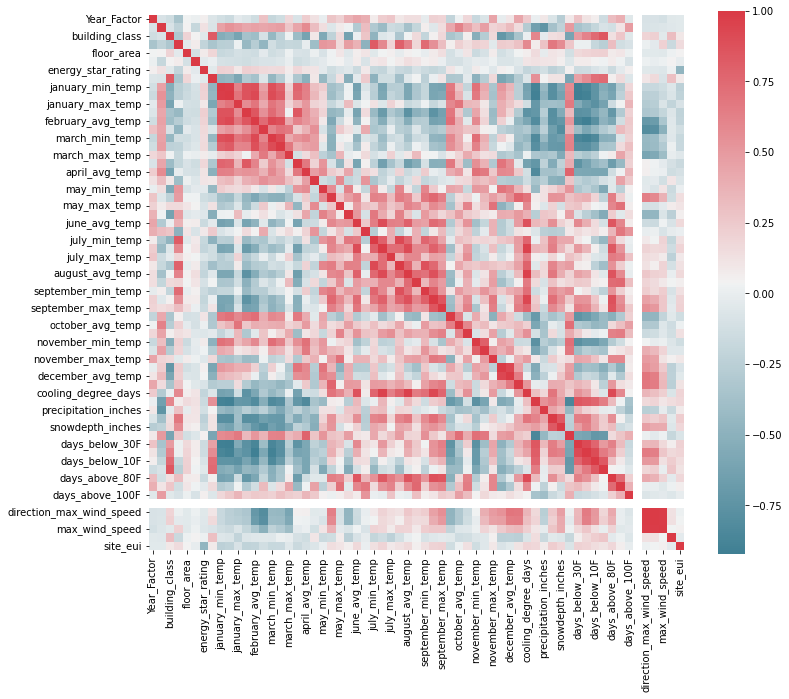

In [ ]:
# Show the plot again, on the altered data
f, ax = plt.subplots(figsize = (12, 10))
corr = data.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = bool), cmap = sns.diverging_palette(220, 10, as_cmap = True), square = True, ax = ax)

In [ ]:
# split X and Y for testing and training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
# Standardize the data
mm=MinMaxScaler()
fit = mm.fit(X_train)
X_train = fit.transform(X_train)
X_test = fit.transform(X_test)

In [ ]:
# Set up a new model for the altered data
model = Sequential()
model.add(Dense(640, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(320, activation = 'relu'))
model.add(Dense(160, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))

In [ ]:
# train the model on the altered data
opt = tf.keras.optimizers.experimental.AdamW(learning_rate = 0.001)
model.compile(loss = 'mae', optimizer = opt, metrics = ['mae'])
history = model.fit(X_train, Y_train, epochs = 100, batch_size = 64, verbose = 1, validation_data = (X_test, Y_test))

loss, acc = model.evaluate(X_test, Y_test, verbose = 0)
print('Test accuracy: %.3f' %acc)

loss, acc = model.evaluate(X_train, Y_train, verbose = 0)
print('Train accuracy: %.3f' %acc)

Epoch 1/100
154/154 [==============================] - 2s 5ms/step - loss: 31.1159 - mae: 31.1159 - val_loss: 25.0200 - val_mae: 25.0200
Epoch 2/100
154/154 [==============================] - 1s 4ms/step - loss: 24.2471 - mae: 24.2471 - val_loss: 24.6524 - val_mae: 24.6524
Epoch 3/100
154/154 [==============================] - 1s 4ms/step - loss: 24.0186 - mae: 24.0186 - val_loss: 24.7114 - val_mae: 24.7114
Epoch 4/100
154/154 [==============================] - 1s 4ms/step - loss: 23.9173 - mae: 23.9173 - val_loss: 24.2054 - val_mae: 24.2054
Epoch 5/100
154/154 [==============================] - 1s 4ms/step - loss: 23.8305 - mae: 23.8305 - val_loss: 24.1821 - val_mae: 24.1821
Epoch 6/100
154/154 [==============================] - 1s 4ms/step - loss: 23.8003 - mae: 23.8003 - val_loss: 25.0340 - val_mae: 25.0340
Epoch 7/100
154/154 [==============================] - 1s 4ms/step - loss: 23.7650 - mae: 23.7650 - val_loss: 24.0876 - val_mae: 24.0876
Epoch 8/100
154/154 [====================

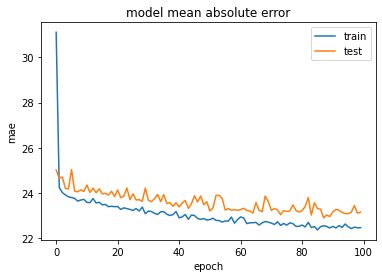

In [ ]:
# Visualize the model accuracy over time
import matplotlib.pyplot as plt
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mean absolute error')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()